# Analysis of CURIE, United States historic spent fuel data 

# Introduction 
This is the analysis of the CURIE data for spent fuel data in the United States from 1968 to 2013. 

In [33]:
import numpy as np
import pandas as pd
from pandas.compat import StringIO
from datetime import datetime
import matplotlib.pyplot as plt

** Read .dat file **

In [2]:
df = pd.read_csv('SNF_nuclide_2020_07_01.dat',sep='\s+',index_col = False)

** Keep only discharge date, isotope name and total mass columns ** 

In [6]:
date_isotope_mass = df[['discharge_date','name','total_mass_g']]

** Rearrange table by total mass of each isotope produced for a specific discharge date** 

In [91]:
table = date_isotope_mass.pivot_table(index='discharge_date',columns='name',aggfunc=sum)
table

total_mass_g                                            \
name                  ac-227       ag-108m       ag-110m        am-241   
discharge_date                                                           
1968-06-21      3.023300e-07  1.593722e-07  1.478946e-26      6.566866   
1969-04-18      4.555560e-08  7.851460e-07  1.678221e-25     21.903593   
1969-09-06      3.143973e-06  9.234351e-04  1.444471e-22   7737.652222   
1969-10-14      7.362290e-08  1.737110e-08  4.363582e-27      0.625914   
1970-04-17      8.957648e-06  1.123117e-03  4.781970e-22  20782.085680   
1970-06-05      1.841099e-06  3.926630e-08  5.205747e-26      3.116541   
1970-10-02      7.616395e-06  8.038441e-04  5.333301e-22  15888.627530   
1971-02-04      2.141955e-06  2.312688e-05  2.973439e-23    833.388023   
1971-02-12      3.583545e-07  8.941749e-06  9.676309e-24    179.430768   
1971-02-26      1.305617e-05  1.274117e-05  2.201240e-23    612.798988   
1971-04-16      9.898955e-06  2.390440e-03  2.281371e-21  27918.587130   
1971-06-05      1.057949e-06  2.918342e-05  3.610813e-22   1524.692835   
1971-09-10      4.261761e-06  1.344088e-03  1.348546e-21  10350.280440   
1971-09-18      2.241541e-06  1.093383e-04  2.401084e-22   2609.454201   
1971-12-25      9.165970e-06  1.769953e-03  3.243565e-21  21695.591390   
1972-02-12      6.601645e-06  5.114968e-04  7.590528e-23   8998.043270   
1972-02-19      2.807257e-05  3.166260e-04  1.170178e-21  10509.233331   
1972-03-18      2.329079e-06  1.843584e-04  5.817096e-22   2367.301178   
1972-04-02      1.769692e-06  8.377664e-05  2.625607e-22   1912.627540   
1972-04-14      9.295807e-06  7.776167e-04  2.646491e-21  13686.181347   
1972-05-01      7.146855e-06  1.100871e-03  3.677407e-21  15026.954582   
1972-06-10      1.287012e-05  3.191770e-03  8.334604e-21  31237.416260   
1972-08-19      4.667374e-07  1.345323e-05  4.020470e-23    253.269834   
1972-08-25      1.511671e-06  4.515607e-05  1.716205e-21   2314.401459   
1972-09-01      1.451156e-06  8.346028e-05  4.740786e-22   1983.798037   
1972-09-30      4.126588e-06  1.040506e-03  6.469177e-21  16570.103570   
1972-10-06      5.468916e-06  1.471116e-03  7.064796e-21  18435.925060   
1972-12-29      5.637225e-06  5.756001e-04  1.450947e-22   8833.864520   
1973-01-17      5.439397e-07  1.586160e-07  1.913286e-24      6.752576   
1973-02-06      1.257852e-05  2.675080e-03  1.334187e-20  27667.285200   
...                      ...           ...           ...           ...   
2012-10-27      3.226615e-06  1.179686e-02  2.066758e-02  22896.080740   
2012-10-31      2.561431e-06  6.643847e-03  1.054807e-02  13770.119140   
2012-11-01      2.860526e-06  8.188750e-03  1.498334e-02  18377.773380   
2012-11-05      3.088225e-06  9.103233e-03  1.662936e-02  20686.489380   
2012-11-12      5.930487e-06  1.841567e-02  2.445110e-02  25531.221992   
2012-11-24      4.430886e-06  1.455545e-02  2.794036e-02  29221.126510   
2013-02-03      5.276783e-06  1.332639e-02  3.260000e-02  27012.342450   
2013-02-04      4.871392e-06  1.386995e-02  3.365670e-02  32009.390190   
2013-02-11      1.150960e-05  3.899839e-02  7.443002e-02  54252.320960   
2013-02-16      4.922413e-06  1.098504e-02  2.155798e-02  21231.379843   
2013-02-17      4.985721e-06  1.292487e-02  2.851896e-02  25111.420230   
2013-03-02      8.821436e-06  2.697335e-02  5.222434e-02  37782.321279   
2013-03-04      5.177065e-06  1.489631e-02  3.679714e-02  29545.333200   
2013-03-10      5.907207e-06  2.149570e-02  5.608506e-02  37519.577008   
2013-03-11      6.144265e-06  1.915488e-02  3.528123e-02  25801.014765   
2013-03-14      7.577166e-06  1.946880e-02  3.836499e-02  30496.148794   
2013-03-16      3.714895e-06  1.368944e-02  3.564236e-02  25699.407820   
2013-03-18      8.705129e-06  2.842171e-02  6.199270e-02  43951.788978   
2013-03-24      2.602051e-06  9.084015e-03  2.295247e-02  18723.455270   
2013-03-25      6.516521e-06  2.445004e-02  4.836700e-02  29813.976891   
2013-03-27      2.89

** Plot for non-cumulative data of each isotope** 

Text(0,0.5,'Total mass (g)')

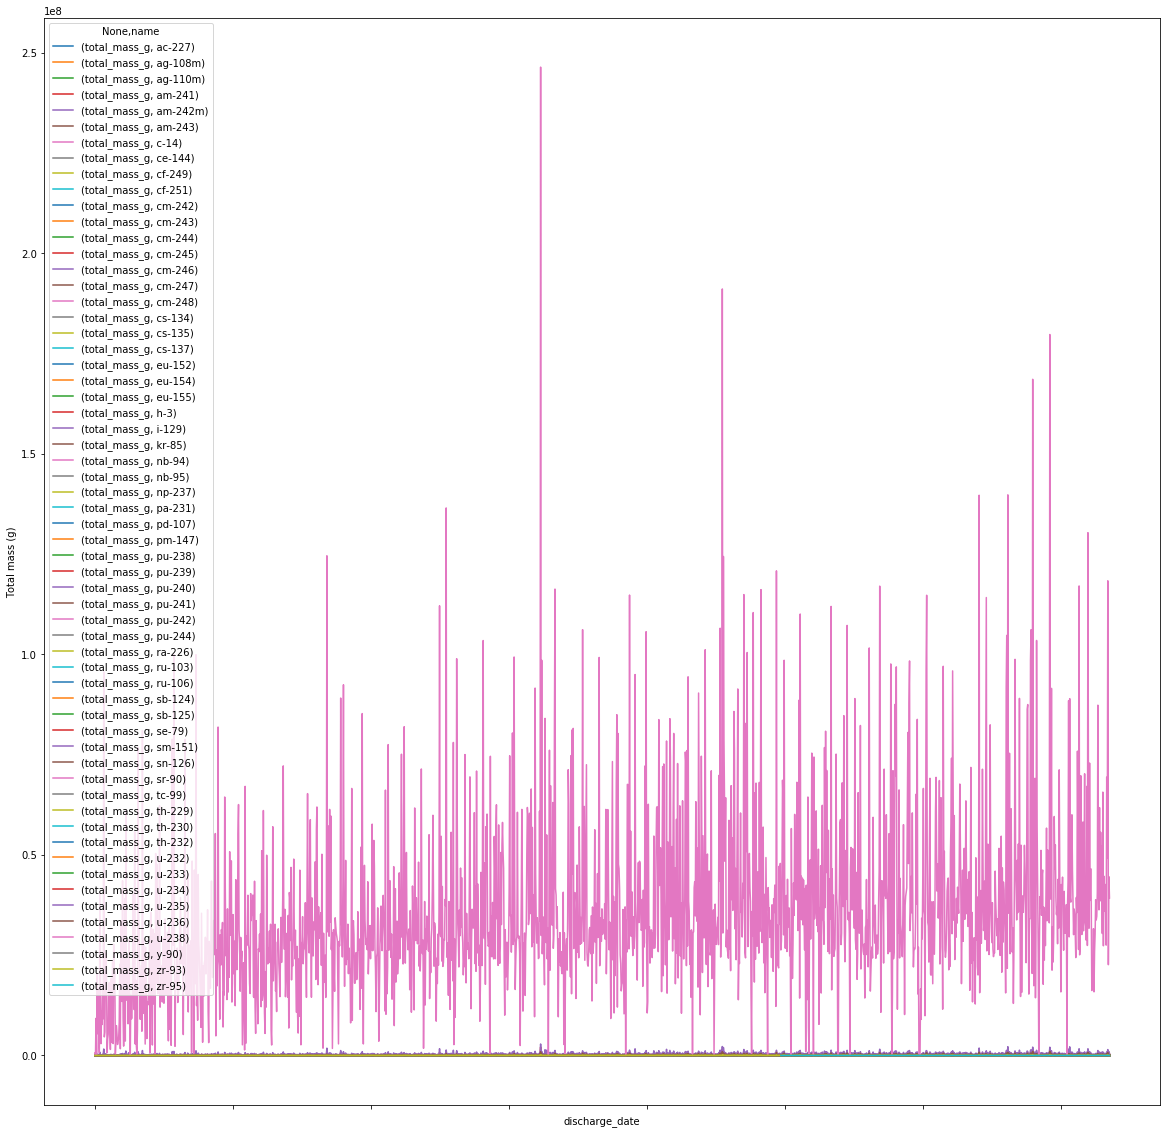

In [90]:
table.plot(figsize = (20,20))
plt.ylabel('Total mass (g)')

** Cumulative mass values for each isotope  ** 

In [ ]:
table_cum = table.cumsum()
table_cum

** Plot for cumulative data of each isotope ** 

In [94]:
table_cum_no_u238= table_cum.drop(('total_mass_g', 'u-238'), 1)

In [ ]:
table_cum.plot(figsize = (20,20))
plt.ylabel('Total mass (g)')

In [71]:
table.shape
table_array.shape

(1838, 60)

In [54]:
unique_dates = table.index.unique()
#for date in unique_dates: 
    


In [72]:
index = table.index 
column = table.columns
#print(index)
#print(column)

In [3]:
ab = df.loc[(df['name'] == 'u-235') & (df['discharge_date'] == '1993-10-01')]